## Importing Libraries

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
print("Imported")

Imported


## Data Pre-processing

### Training Images Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical", ##label_mode = "categorical" , as we are solving problem of 7 classes, multiclasses(more than 2 classes), model should predict the correct class
    class_names=None, # same name as of sub-directory name
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),  
    shuffle=True,  #shuffles the data feeded to the model while training
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 628 files belonging to 7 classes.


### Validation Image Preprocessing

In [9]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical", ##label_mode = "categorical" , as we are solving problem of 7 classes, multiclasses(more than 2 classes), model should predict the correct class
    class_names=None, # same name as of sub-directory name
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),  
    shuffle=True,  #shuffles the data feeded to the model while training
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 244 files belonging to 7 classes.


In [4]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 7), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[  0.         0.         0.      ]
   [  0.         0.         0.      ]
   [  0.         0.         0.      ]
   ...
   [  0.         0.         0.      ]
   [  0.         0.         0.      ]
   [  0.         0.         0.      ]]

  [[  0.         0.         0.      ]
   [  0.         0.         0.      ]
   [  0.         0.         0.      ]
   ...
   [  0.         0.         0.      ]
   [  0.         0.         0.      ]
   [  0.         0.         0.      ]]

  [[  0.         0.         0.      ]
   [  0.         0.         0.      ]
   [  0.         0.         0.      ]
   ...
   [  0.         0.         0.      ]
   [  0.         0.         0.      ]
   [  0.         0.         0.      ]]

  ...

  [[  0.         0.         0.      ]
   [  0.         0.         0.      ]
   [  0.         0.         0.      ]
   ...
   [  0.         0.         0.      ]
   [  0.         0.         0.      ]
   [  0.         0.         0.      ]]

  [[  0.         0.         0.    

## Building Model

In [6]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten   #used for convolutional operations, flattening
from tensorflow.keras.layers import MaxPool2D   #used for pooling
from tensorflow.keras.models import Sequential   #used to build the sequential model
print("Imported")

Imported


### Creating the model

In [7]:
model = Sequential()   #object of the sequential library
print("Created")

Created


### Building the Convolutional Layer
### Layer 1 32 filters

In [8]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape = [128, 128, 3]))
model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
print("Added First Layer")

Added First Layer


### Layer 2 64 filters

In [9]:
model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPool2D(pool_size = 2, strides = 2))
print("Added second Layer")

Added second Layer


### Layer 3 128 filters

In [10]:
model.add(Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPool2D(pool_size = 2, strides = 2))
print("Added third Layer")

Added third Layer


### Layer 4 256 filters

In [11]:
model.add(Conv2D(filters=256, kernel_size=3, padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPool2D(pool_size = 2, strides = 2))
print("Added fourth Layer")

Added fourth Layer


### Flattening the input

In [12]:
model.add(Flatten())
print("Flatenned")

Flatenned


### Add Hidden Layers

In [13]:
model.add(Dense(units=1024, activation="relu"))
print("Added hidden layers")

Added hidden layers


### Add the output

In [14]:
model.add(Dense(units=7, activation='softmax'))   #38 neurons for 13 classes in total, and it will probablity for each class.
print("Added the final Output layer")

Added the final Output layer


### Compile the Model 

In [15]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Compiled Successfully")

Compiled Successfully


### Model Summary

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                    

## Model Training

In [18]:
print("Model Started to Train")
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)
print("Model Training Finished")

Model Started to Train
Epoch 1/10
20/20 [==============================] - 45s 2s/step - loss: 1.6633 - accuracy: 0.3201 - val_loss: 1.4184 - val_accuracy: 0.3893
Epoch 2/10
20/20 [==============================] - 43s 2s/step - loss: 0.8788 - accuracy: 0.6640 - val_loss: 0.9896 - val_accuracy: 0.5287
Epoch 3/10
20/20 [==============================] - 42s 2s/step - loss: 0.5948 - accuracy: 0.7659 - val_loss: 0.5853 - val_accuracy: 0.7500
Epoch 4/10
20/20 [==============================] - 42s 2s/step - loss: 0.5274 - accuracy: 0.7755 - val_loss: 0.7957 - val_accuracy: 0.7377
Epoch 5/10
20/20 [==============================] - 42s 2s/step - loss: 0.5488 - accuracy: 0.7994 - val_loss: 0.5364 - val_accuracy: 0.8074
Epoch 6/10
20/20 [==============================] - 42s 2s/step - loss: 0.4274 - accuracy: 0.8360 - val_loss: 0.6704 - val_accuracy: 0.7582
Epoch 7/10
20/20 [==============================] - 42s 2s/step - loss: 0.5728 - accuracy: 0.7834 - val_loss: 0.6441 - val_accuracy: 0.77

### Model Evaluation

In [19]:
#model evaluation on training set
train_loss, train_acc = model.evaluate(training_set)

20/20 [==============================] - 11s 463ms/step - loss: 0.3765 - accuracy: 0.8726


In [20]:
print(train_loss, train_acc)

0.3764992654323578 0.8726114630699158


In [21]:
#model evaluation on validation set
val_loss, val_acc = model.evaluate(validation_set)

8/8 [==============================] - 5s 367ms/step - loss: 0.6780 - accuracy: 0.7992


In [22]:
print(val_loss, val_acc)

0.6780411005020142 0.7991803288459778


##  Model Saving

In [23]:
model.save("weed_trained_Model.keras")
print("Model Saved Successfully")

Model Saved Successfully


In [ ]:
from tensorflow.keras.models import load_model
# Load the saved model
model = load_model('weed_trained_Model.keras')

print("Model Loaded Successfully")

# Optionally, display the model summary
model.summary()

### Printing Model History and Visualising the Model Metrics

In [ ]:
# returns the dictionary of history  
training_history.history

### Save Training History

In [25]:
# ---------------------------------Recording History in json file----------------------------#
# we record this in a json file so that we can use the parameters in the future
# import json

# # create a file and write the training history in it
# with open("training_history.json", "w") as f:
#     json.dump(training_history.history, f)
# print("json file created")

json file created


## Accuracy Visualisation and other Metrics

In [ ]:
training_history.history['accuracy']

In [ ]:
##plotting
epochs = [i for i in range(1,4)]
epochs
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Train Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='green', label='Validation Accuracy')

### Accuracy by reading from the json file

In [1]:
### Reading the Metrics from the training.json file
import json

# Load training history from JSON file
with open('training_history.json', 'r') as file:
    weed_training_history = json.load(file)

print("File opened and read")

File opened and read


In [2]:
### accessing the metrics in the json file
train_acc = weed_training_history['accuracy']
train_loss = weed_training_history['loss']
val_acc = weed_training_history['val_accuracy']
val_loss = weed_training_history['val_loss']
print("Loaded the Varibles")
val_acc

Loaded the Varibles


[0.3893442749977112,
 0.5286885499954224,
 0.75,
 0.7377049326896667,
 0.8073770403862,
 0.7581967115402222,
 0.7786885499954224,
 0.8360655903816223,
 0.8606557250022888,
 0.7991803288459778]

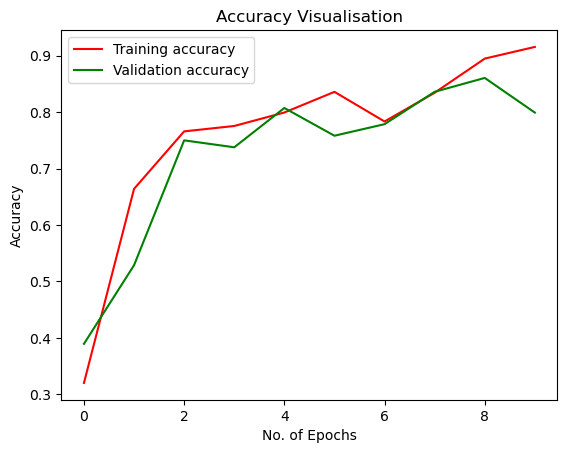

In [5]:
# 1st Graph; No. of epochs(x) vs Accuracy(y)

import matplotlib.pyplot as plt

# array 'epochs' to access the elements one by one from the arrays
epochs = [i for i in range(10)]

# plotting the accuracy
plt.plot(epochs, train_acc, color='red', label='Training accuracy')
plt.plot(epochs, val_acc, color='green', label='Validation accuracy')
plt.title("Accuracy Visualisation")
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.legend()    # to show the key of the graph
plt.show()

### Precision

In [10]:
# we will create a class of all 13 classes in the dataset and print the class names
class_name = validation_set.class_names
class_name

['Ambrosia_Rag_weed',
 'Amsinkia_Chickpeas',
 'Cannabis_Marijuana',
 'Common_taraxacum_dandelion',
 'Erigeron_canadensis_horse_weed',
 'Otanthus_maritimus_Cotton_Weed',
 'Trianthema_portulacastrum_Pig_Weed']

In [11]:
# temporarily using validation_set as test_set

test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical", ##label_mode = "categorical" , as we are solving problem of 38 classes, multiclasses(more than 2 classes), model should predict the correct class
    class_names=None, # same name as of sub-directory name
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),  
    shuffle=False,  #passing the test_set in alphabet-wise order
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 244 files belonging to 7 classes.


### Making Predicting from Validation Set

In [12]:
## loading the saved model
import tensorflow as tf

# Load the saved model
loaded_model = tf.keras.models.load_model('weed_trained_Model.keras')
print("Model Loaded Successfully")


Model Loaded Successfully


In [13]:
# making prediction on the model on test_set
y_pred = loaded_model.predict(test_set)
y_pred, y_pred.shape

8/8 [==============================] - 5s 479ms/step


(array([[2.4345483e-01, 7.9046686e-07, 7.1489263e-01, ..., 3.9908487e-02,
         4.7450815e-04, 1.2658826e-03],
        [3.1039768e-01, 4.2773581e-06, 4.4290805e-01, ..., 2.4667467e-01,
         5.9330609e-06, 5.1239726e-06],
        [3.1633425e-01, 4.1818006e-05, 4.4036472e-01, ..., 2.3403066e-01,
         7.6684486e-03, 1.1736167e-03],
        ...,
        [3.7660861e-19, 1.3866232e-27, 1.0762581e-11, ..., 2.9314412e-20,
         1.9808819e-19, 1.0000000e+00],
        [1.0374028e-15, 1.0918981e-22, 2.1680369e-09, ..., 2.2076369e-13,
         1.3101613e-13, 1.0000000e+00],
        [1.7600033e-14, 3.7902377e-21, 1.9074992e-13, ..., 1.0698876e-13,
         2.8241545e-13, 1.0000000e+00]], dtype=float32),
 (244, 7))

In [14]:
# predicted categories, return the maximum probablity in row fashion
pred_categories = tf.argmax(y_pred, axis=1)
pred_categories

<tf.Tensor: shape=(244,), dtype=int64, numpy=
array([2, 2, 2, 0, 4, 4, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 4, 2, 2, 0, 4, 0,
       2, 2, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 4, 4, 4, 2, 4,
       4, 4, 2, 2, 0, 2, 2, 4, 2, 4, 4, 4, 4, 4, 0, 4, 2, 4, 2, 2, 4, 2,
       2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 2, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2,
       6, 6, 2, 6, 6, 6, 6, 6, 2, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6], dtype=int64)>

In [15]:
# actual true categories
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(244, 7), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [16]:
# true categories, return the maximum probablity in row fashion
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(244,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6], dtype=int64)>

### Classification Report

In [17]:
# its okay to remove this part

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_true, pred_categories, target_names=class_name))

                                    precision    recall  f1-score   support

                 Ambrosia_Rag_weed       0.75      0.36      0.49        25
                Amsinkia_Chickpeas       1.00      0.90      0.95        29
                Cannabis_Marijuana       0.57      0.96      0.71        48
        Common_taraxacum_dandelion       1.00      0.75      0.86        24
    Erigeron_canadensis_horse_weed       0.65      0.52      0.58        29
    Otanthus_maritimus_Cotton_Weed       0.93      1.00      0.96        41
Trianthema_portulacastrum_Pig_Weed       1.00      0.83      0.91        48

                          accuracy                           0.80       244
                         macro avg       0.84      0.76      0.78       244
                      weighted avg       0.84      0.80      0.80       244



### Confusion Matrix

In [18]:
# creating the confusion matrix
cm = confusion_matrix(Y_true, pred_categories)

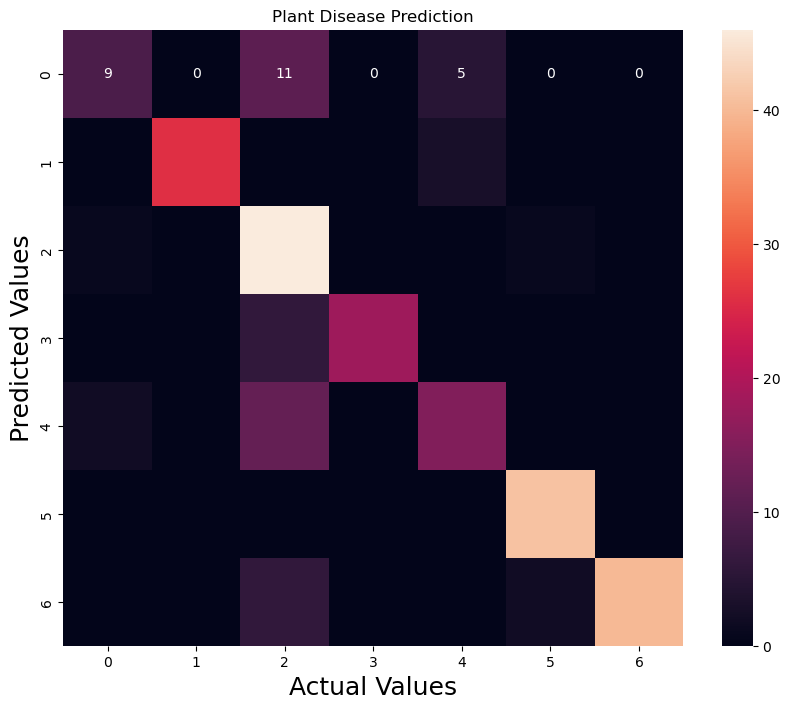

In [19]:
# printing the matrix in a plotted form
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, annot_kws={'fontsize': 10})
plt.title("Plant Disease Prediction")
plt.xlabel("Actual Values", fontsize=18)
plt.ylabel("Predicted Values", fontsize=18)
plt.show()

### The Model has been built and also evaluated based on some metrics